# Dataset Creation with Keras
In this notebook, the creation of a simple annotated dataset for image classification tasks will be covered. We will create a tiny custom dataset of images from 4 different cartoons (Looney Tunes, The Simpsons, Tom & Jerry, Scooby-Doo). The images can be stored in a local folder. The corresponding labels are defined in the name of the folder.

In [13]:
# Imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [14]:
# Define parameters
image_size = (180, 180)
batch_size = 128

# Load custom dataset
train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    "../../data/custom_dataset/",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 16 files belonging to 3 classes.
Using 13 files for training.
Using 3 files for validation.


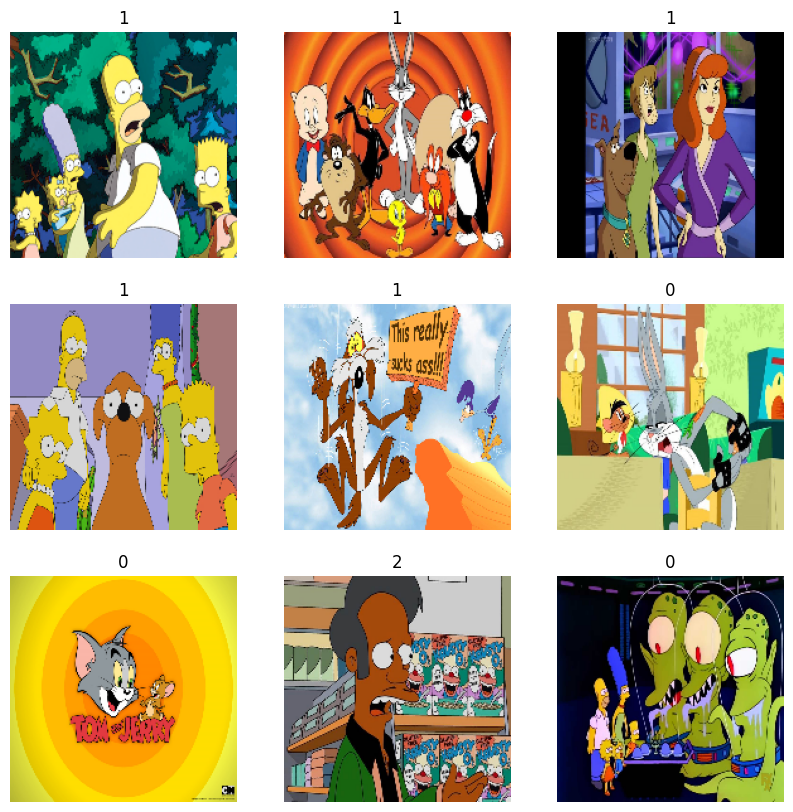

In [15]:
# Visualize data
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

## Using image data augmentation
When you don't have a large image dataset, it's a good practice to artificially introduce sample diversity by applying random yet realistic transformations to the training images, such as random horizontal flipping or small random rotations. This helps expose the model to different aspects of the training data while slowing down overfitting.

In [16]:
# Define the data augmentation transforms
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

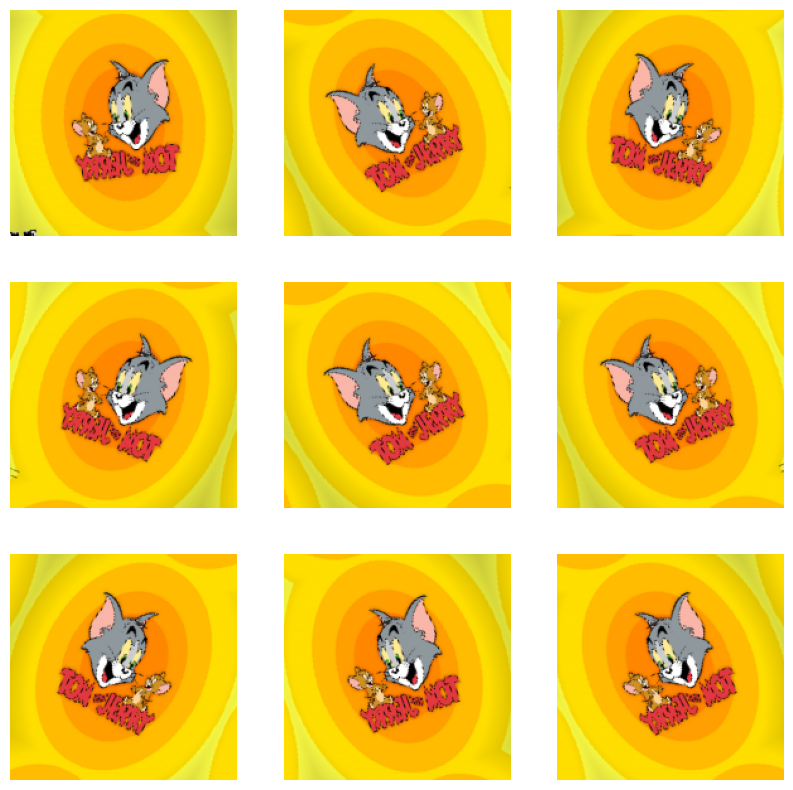

In [17]:
# Visualize transformed data
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")